In [4]:
import pandas as pd
from pgmpy.models import BayesianNetwork
from pgmpy.models import MarkovNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
import numpy as np

from pgmpy.factors.discrete.CPD import TabularCPD

def print_full(cpd):
    backup = TabularCPD._truncate_strtable
    TabularCPD._truncate_strtable = lambda self, x: x
    print(cpd)
    TabularCPD._truncate_strtable = backup

In [11]:
from pgmpy.metrics import log_likelihood_score

model_structure = [
    # First layer
    ('L1_1', 'L2_1'),
    ('L1_1', 'L2_2'),

    # Second layer
    ('L2_1', 'L3_1'),
    ('L2_1', 'L3_3'),

    ('L2_2', 'L3_1'),
    ('L2_2', 'L3_2'),
    ('L2_2', 'L3_4'),
    # Third layer
    ('L3_1', 'L4_1'),
    ('L3_1', 'L4_2'),
    ('L3_1', 'L4_3'),
    ('L3_1', 'L4_4'),

    ('L3_2', 'L4_4'),

    ('L3_3', 'L4_5'),
    ('L3_4', 'L4_5'),
]


data = pd.read_csv('data/Compound_per_sample.csv').drop(columns=['Sample'])

# Load the data
data = pd.read_csv('data/Compound_per_sample.csv').drop(columns=['Sample'])

# Perform Leave-One-Out Cross-Validation
log_likelihoods = []

for i in range(len(data)):
    # Split the data
    test_data = data.iloc[[i]]
    train_data = data.drop(data.index[i])

    print(test_data)
    print(train_data)
    
    
    # Create and fit the model
    model = BayesianNetwork(model_structure)
    model.fit(train_data)
    
    # Calculate log-likelihood score
    ll_score = log_likelihood_score(model, test_data)
    log_likelihoods.append(ll_score)
    
    print(f"Sample {i+1}: Log-Likelihood Score = {ll_score}")

# Calculate and print the average log-likelihood score
average_ll = sum(log_likelihoods) / len(log_likelihoods)
print(f"\nAverage Log-Likelihood Score: {average_ll}")

Sample 1: Log-Likelihood Score = -inf


/usr/scratch/danial_stuff/anaconda3/envs/Chroma/lib/python3.10/site-packages/pgmpy/metrics/bn_inference.py:92: RuntimeWarning: divide by zero encountered in log
  return np.log(probability_node)


KeyError: 1

In [4]:
# set the seed
cpds_per_iter = []
for iter in range(1000):
  samples = data.sample(n=len(data),replace=True)

  model = BayesianNetwork([
      # First layer
      ('L1_1', 'L2_1'),
      ('L1_1', 'L2_2'),

      # Second layer
      ('L2_1', 'L3_1'),
      ('L2_1', 'L3_3'),

      ('L2_2', 'L3_1'),
      ('L2_2', 'L3_2'),
      ('L2_2', 'L3_4'),
      # Third layer
      ('L3_1', 'L4_1'),
      ('L3_1', 'L4_2'),
      ('L3_1', 'L4_3'),
      ('L3_1', 'L4_4'),

      ('L3_2', 'L4_4'),

      ('L3_3', 'L4_5'),
      ('L3_4', 'L4_5'),
  ])

  model.fit(samples)
  cpds_per_iter.append(model.get_cpds())
  print(f'Iteration {iter} done')

Iteration 0 done
Iteration 1 done
Iteration 2 done
Iteration 3 done
Iteration 4 done
Iteration 5 done
Iteration 6 done
Iteration 7 done
Iteration 8 done
Iteration 9 done
Iteration 10 done
Iteration 11 done
Iteration 12 done
Iteration 13 done
Iteration 14 done
Iteration 15 done
Iteration 16 done
Iteration 17 done
Iteration 18 done
Iteration 19 done
Iteration 20 done
Iteration 21 done
Iteration 22 done
Iteration 23 done
Iteration 24 done
Iteration 25 done
Iteration 26 done
Iteration 27 done
Iteration 28 done
Iteration 29 done
Iteration 30 done
Iteration 31 done
Iteration 32 done
Iteration 33 done
Iteration 34 done
Iteration 35 done
Iteration 36 done
Iteration 37 done
Iteration 38 done
Iteration 39 done
Iteration 40 done
Iteration 41 done
Iteration 42 done
Iteration 43 done
Iteration 44 done
Iteration 45 done
Iteration 46 done
Iteration 47 done
Iteration 48 done
Iteration 49 done
Iteration 50 done
Iteration 51 done
Iteration 52 done
Iteration 53 done
Iteration 54 done
Iteration 55 done
It

In [118]:
import numpy as np


def concatenate_first_k_rows(arr, k):
    # Concatenate the first k rows element-wise
    concatenated = np.array(['' if i == 0 else ''.join(arr[:k, i]) for i in range(arr.shape[1])])
    
    # Create a new array with the concatenated row and the remaining rows
    result = np.vstack([concatenated, arr[k:]])
    
    return result


cpd_per_shape = {}

cpds_df = []
for cpds in cpds_per_iter:
    cpd = cpds[3]

    # print_full(cpd)

    # Allocate if not already allocated, otherwise add to existing

    cardinality = cpd.cardinality

    num_rows = len(cpd.variables)-1

    transformed = concatenate_first_k_rows(np.array(cpd._make_table_str(return_list=True)), k=num_rows)

    # Create DataFrame
    df = pd.DataFrame(transformed[1:], columns=transformed[0])

    # Set the first column as index
    df.set_index(df.columns[0], inplace=True)

    cpds_df.append(df)


In [121]:
cpds_df[0:2]

[        L2_1(0)L2_2(1) L2_1(1)L2_2(1)
                                      
 L3_1(0)            1.0            0.0
 L3_1(1)            0.0            1.0,
         L2_1(0)L2_2(0) L2_1(0)L2_2(1) L2_1(1)L2_2(0) L2_1(1)L2_2(1)
                                                                    
 L3_1(0)            1.0            1.0            0.5            0.0
 L3_1(1)            0.0            0.0            0.5            1.0]

In [78]:

for cpd in cpd_per_shape[(2, 1)]:

    print(cpd.cardinality)

[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]
[2 1 1]


<Axes: >

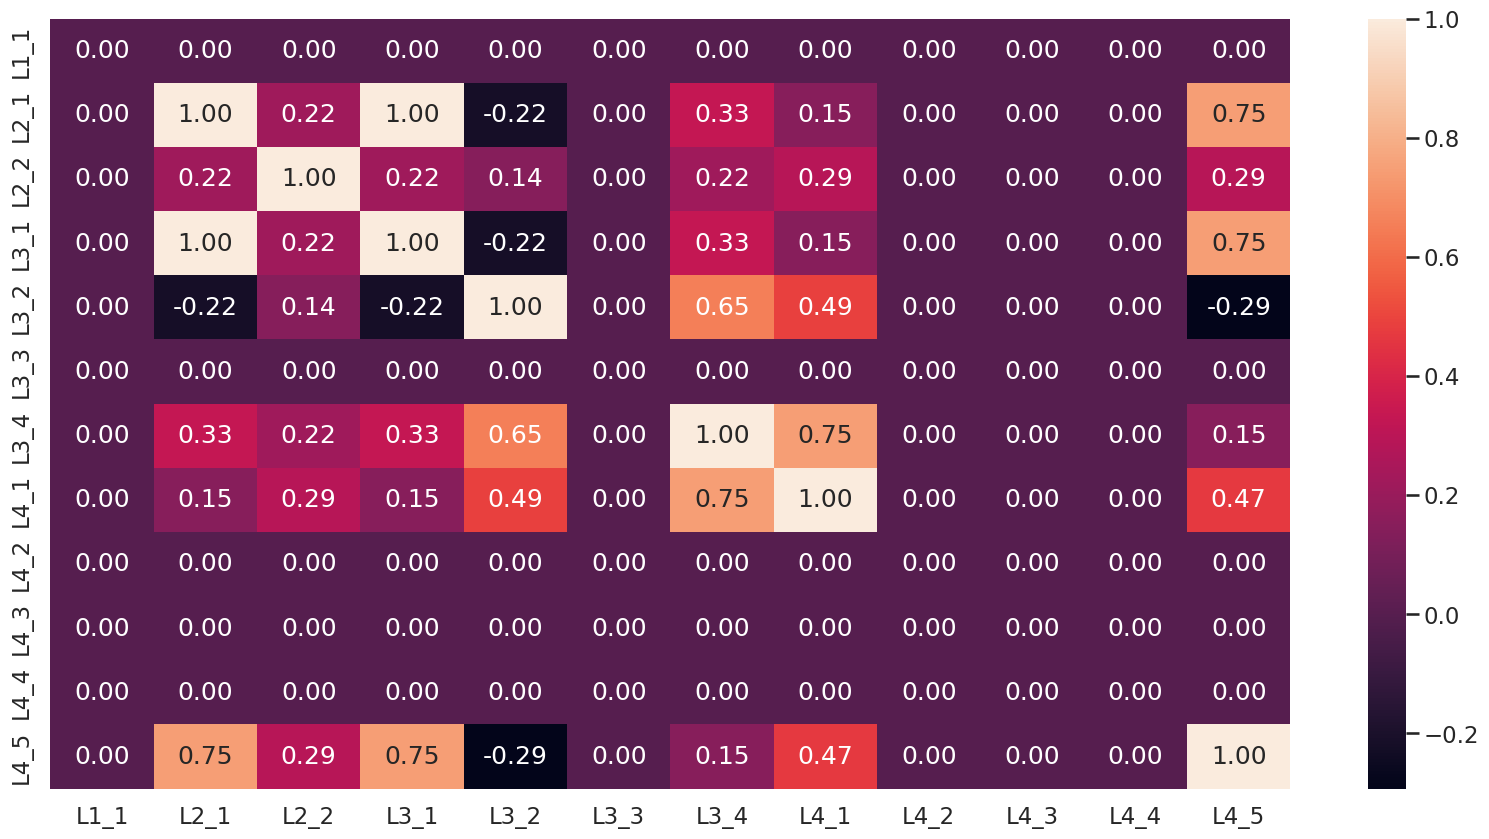

In [97]:
# plot in seaborn
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
sns.heatmap(data.corr().fillna(0), annot=True, fmt=".2f")

/tmp/ipykernel_126327/292343046.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = stats.pearsonr(pair_df[col1], pair_df[col2])
/tmp/ipykernel_126327/292343046.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = stats.pearsonr(pair_df[col1], pair_df[col2])
/tmp/ipykernel_126327/292343046.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = stats.pearsonr(pair_df[col1], pair_df[col2])
/tmp/ipykernel_126327/292343046.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = stats.pearsonr(pair_df[col1], pair_df[col2])
/tmp/ipykernel_126327/292343046.py:27: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_corr, p_value = stats.pearsonr(pair_df[co

Formatted table has been saved to 'correlation_and_mic_results_formatted.txt'

Here's the formatted table:
| Variable 1   | Variable 2   |   Pearson Correlation (r) | P-value     |   MIC |
|:-------------|:-------------|--------------------------:|:------------|------:|
| L1_1         | L2_1         |                    nan    | P > nan     |  0    |
| L2_1         | L1_1         |                    nan    | P > nan     |  0    |
| L1_1         | L2_2         |                    nan    | P > nan     |  0    |
| L2_2         | L1_1         |                    nan    | P > nan     |  0    |
| L1_1         | L3_1         |                    nan    | P > nan     |  0    |
| L3_1         | L1_1         |                    nan    | P > nan     |  0    |
| L1_1         | L3_2         |                    nan    | P > nan     |  0    |
| L3_2         | L1_1         |                    nan    | P > nan     |  0    |
| L1_1         | L3_3         |                    nan    | P > nan     |

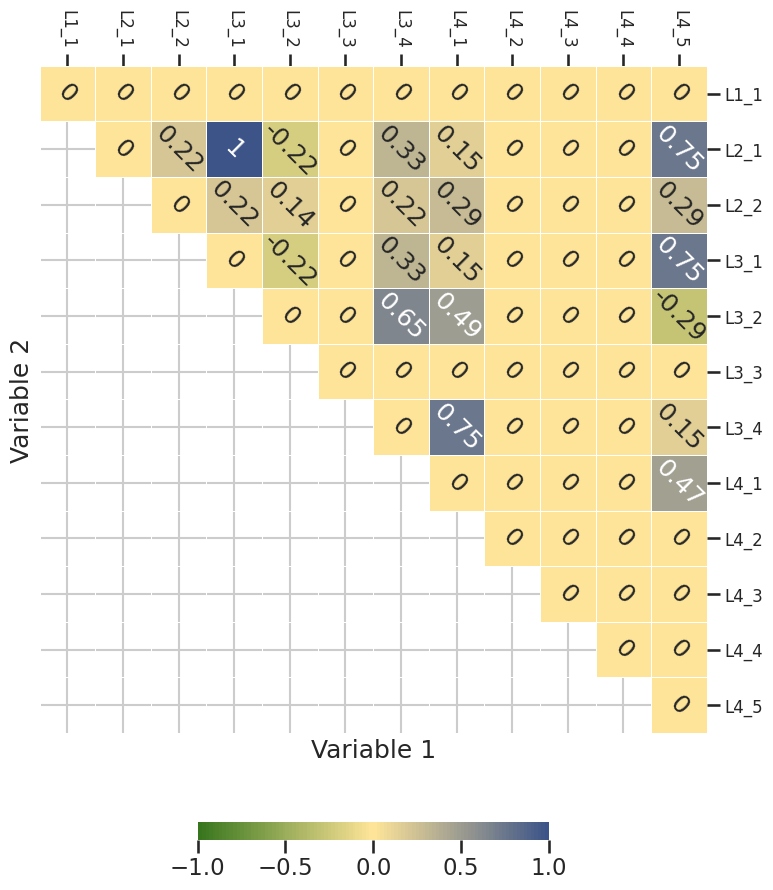

Rotated lower triangle heatmap with green-yellow-blue colormap has been saved as 'correlation_heatmap_green_yellow_blue.png'


<Figure size 640x480 with 0 Axes>

In [99]:
import pandas as pd
import numpy as np
from scipy import stats
from minepy import MINE
from tabulate import tabulate

def calculate_correlations_and_mic(dataframe):
    results = []
    columns = dataframe.columns
    
    for i in range(len(columns)):
        for j in range(i+1, len(columns)):
            col1, col2 = columns[i], columns[j]
            
            try:
                pair_df = dataframe[[col1, col2]].apply(pd.to_numeric, errors='coerce')
            except Exception as e:
                print(f"Error converting {col1} and {col2} to numeric: {str(e)}")
                continue
            
            # print(pair_df)
            # import code; code.interact(local=locals())
            pair_df = pair_df.dropna()
            
            if len(pair_df) > 1:
                try:
                    pearson_corr, p_value = stats.pearsonr(pair_df[col1], pair_df[col2])
                    
                    mine = MINE()
                    mine.compute_score(pair_df[col1].values, pair_df[col2].values)
                    mic = mine.mic()
                    
                    results.append({
                        'Variable 1': col1,
                        'Variable 2': col2,
                        'Pearson Correlation (r)': pearson_corr,
                        'P-value': p_value,
                        'MIC': mic
                    })

                    results.append({
                        'Variable 1': col2,
                        'Variable 2': col1,
                        'Pearson Correlation (r)': pearson_corr,
                        'P-value': p_value,
                        'MIC': mic
                    })
                except Exception as e:
                    print(f"Error calculating correlation for {col1} and {col2}: {str(e)}")
    
    return pd.DataFrame(results)

def format_p_value(p):
    if p < 0.00000001:
        return 'P < 10^(-8)'
    elif p < 0.0000001:
        return 'P < 10^(-7)'
    elif p < 0.000001:
        return 'P < 10^(-6)'
    elif p < 0.00001:
        return 'P < 10^(-5)'
    elif p < 0.0001:
        return 'P < 10^(-4)'
    elif p < 0.001:
        return 'P < 10^(-3)'
    elif p < 0.01:
        return 'P < 10^(-2)'
    elif p < 0.05:
        return 'P < 0.05'
    else:
        return f'P > {p:.2f}'

def generate_formatted_table(df):
    df_formatted = df.copy()
    df_formatted['Pearson Correlation (r)'] = df_formatted['Pearson Correlation (r)'].apply(lambda x: f"{x:.2f}")
    df_formatted['P-value'] = df_formatted['P-value'].apply(format_p_value)
    df_formatted['MIC'] = df_formatted['MIC'].apply(lambda x: f"{x:.2f}")
    
    table = tabulate(df_formatted, headers='keys', tablefmt='pipe', showindex=False)
    return table

# Calculate correlations and MIC
results_df = calculate_correlations_and_mic(data)

# Generate formatted table
formatted_table = generate_formatted_table(results_df)

# Save formatted table to a text file
with open('correlation_and_mic_results_formatted.txt', 'w') as f:
    f.write(formatted_table)
print("Formatted table has been saved to 'correlation_and_mic_results_formatted.txt'")

# Print the table to the console
print("\nHere's the formatted table:")
print(formatted_table)

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Pivot the results_df to create a square matrix of correlations
correlation_matrix = results_df.pivot(index='Variable 1', columns='Variable 2', values='Pearson Correlation (r)')

correlation_matrix = correlation_matrix.fillna(0)

# Create a mask to show only the lower triangle
mask = np.tril(np.ones_like(correlation_matrix, dtype=bool), k=-1)

# Create a custom colormap: green to yellow to blue
colors = ['#38761d', '#ffe599', '#3C5488']  # Blue, Yellow, Green
n_bins = 100  # Number of color gradations
cmap = LinearSegmentedColormap.from_list('custom', colors, N=n_bins)

# Set up the matplotlib figure
plt.figure(figsize=(8, 10))

# Create the heatmap
sns.heatmap(correlation_matrix.T, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5,cbar_kws={"shrink": .5, "orientation": "horizontal", "pad": 0.1}, annot_kws={'rotation': 315, 'va': 'center', 'ha': 'center'})

# Rotate the tick labels and adjust their position
# Move x-axis to the top
plt.tick_params(axis='x', which='both', bottom=False, top=True, labelbottom=False, labeltop=True)

# Move y-axis to the right
plt.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelright=True)

# Set x-ticks rotation and font size
plt.xticks(rotation=270, ha='center', fontsize=12)

# Set y-ticks rotation and font size
plt.yticks(rotation=0, fontsize=12)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Save the figure
plt.savefig('correlation_heatmap_green_yellow_blue.pdf', dpi=300, bbox_inches='tight')
print("Rotated lower triangle heatmap with green-yellow-blue colormap has been saved as 'correlation_heatmap_green_yellow_blue.png'")

In [209]:
from pgmpy.models import BayesianNetwork

values = pd.DataFrame(np.random.randint(low=0, high=2, size=(100, 5)),columns=['A', 'B', 'C', 'D', 'E'])
train_data = values[:80]
predict_data = values[80:]
model = BayesianNetwork([('A', 'B'), ('C', 'B'), ('C', 'D'), ('B', 'E')])
model.fit(values)
predict_data = predict_data.copy()
predict_data.drop('E', axis=1, inplace=True)
y_pred = model.predict(predict_data)
y_pred


100%|██████████| 14/14 [00:00<00:00, 6230.93it/s]


11375.99s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11376.17s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11376.35s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11376.52s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11376.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11376.88s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11377.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11377.23s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11377.40s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11377.57s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
11377.75s - pydevd: Sending message rela

,E
0,0
1,0
2,1
3,1
4,0
5,1
6,1
7,0
8,1
9,0


In [60]:
import torch
import time
import random

# Set random seed for reproducibility
torch.manual_seed(42)
random.seed(42)

# Check if CUDA is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create random matrix A and vector X
A = torch.rand(4096, 4096, device=device)
X = torch.rand(4096, device=device)

# Function to reduce precision of 50% entries
def reduce_precision(tensor):
    mask = torch.rand_like(tensor) < 0.8
    reduced = tensor.clone()
    reduced[mask] = torch.round(reduced[mask] * 10) / 10
    return reduced

# Reduce precision of 50% entries in A
A_reduced = reduce_precision(A)


# Function to perform matrix-vector multiplication
def matrix_vector_mul(matrix, vector):
    return torch.matmul(matrix, vector)

# Warm-up GPU
for _ in range(100):
    _ = matrix_vector_mul(A, X)
    _ = matrix_vector_mul(A_reduced, X)

# Measure execution time for full precision
start_time = time.time()
for _ in range(1000):
    result_full = matrix_vector_mul(A, X)
end_time = time.time()
full_precision_time = end_time - start_time

# Measure execution time for reduced precision
start_time = time.time()
for _ in range(1000):
    result_reduced = matrix_vector_mul(A_reduced, X)
end_time = time.time()
reduced_precision_time = end_time - start_time

# Calculate speedup
speedup = full_precision_time / reduced_precision_time

print(f"Full precision time: {full_precision_time:.6f} seconds")
print(f"Reduced precision time: {reduced_precision_time:.6f} seconds")
print(f"Speedup: {speedup:.2f}x")

# Check for numerical differences
max_diff = torch.max(torch.abs(result_full - result_reduced))
print(f"Maximum absolute difference in results: {max_diff:.6f}")

Using device: cuda
Full precision time: 0.015809 seconds
Reduced precision time: 0.092907 seconds
Speedup: 0.17x
Maximum absolute difference in results: 4.173950


In [56]:
full_precision_time

0.008865833282470703

0.009625434875488281

Full precision time: 0.009674 seconds
Reduced precision time: 0.009625 seconds
Speedup: 1.01x
Maximum absolute difference in results: 0.041016


In [53]:
A_reduced

tensor([[0.4777, 0.9340, 0.4520,  ..., 0.1785, 0.2240, 0.4150],
        [0.8510, 0.0310, 0.1680,  ..., 0.9490, 0.5231, 0.3880],
        [0.9140, 0.9360, 0.4574,  ..., 0.7100, 0.5320, 0.9965],
        ...,
        [0.5730, 0.7060, 0.9410,  ..., 0.6300, 0.4706, 0.6550],
        [0.1330, 0.5340, 0.4462,  ..., 0.8830, 0.2620, 0.2524],
        [0.7580, 0.2530, 0.8480,  ..., 0.0926, 0.6040, 0.7200]],
       device='cuda:0')

In [54]:
A

tensor([[0.4777, 0.9344, 0.4523,  ..., 0.1785, 0.2239, 0.4150],
        [0.8510, 0.0308, 0.1681,  ..., 0.9487, 0.5231, 0.3876],
        [0.9141, 0.9363, 0.4574,  ..., 0.7096, 0.5321, 0.9965],
        ...,
        [0.5732, 0.7057, 0.9409,  ..., 0.6304, 0.4706, 0.6545],
        [0.1325, 0.5343, 0.4462,  ..., 0.8829, 0.2617, 0.2524],
        [0.7581, 0.2526, 0.8484,  ..., 0.0926, 0.6036, 0.7203]],
       device='cuda:0')